# IT 503 STRATEGIC PLANNING AND MANAGEMENT 

# MBUSA ELIJAH

<b>M21/PGDIS/405U</b>

In this test, I have designed model to predict the number of deaths due to covid-19 Pandemic in Africa

My focus will be predicting daily deaths using pearson correlation & identifying the most severe transimission mode of covid-19 with respect to correlations, p-value, and F-1Scores performance evaluation metrices

Data set from URL: https://covid19.who.int/table <b>as at July 11th 2021 at 6.24.14 PM <b/>

<b>Importing libraries</b>

In [1]:
import pandas as pd
import numpy as np

<b>Loading the data set</b>

In [2]:
file=pd.read_csv("WHO COVID-19 global table data July 11th 2021 at 6.24.14 PM.csv",sep=",")#This has global regions
Data= file.loc[(file['WHO Region'] == 'Africa')]#Reads only for Africa region
Data.head()#preview first five rows

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours,Transmission Classification
18,South Africa,Africa,2135246,3600.22,139690,235.53,22910,63499,107.07,2470,4.16,460,Community transmission
70,Ethiopia,Africa,276799,240.77,549,0.48,116,4341,3.78,16,0.01,3,Community transmission
82,Kenya,Africa,187525,348.75,2988,5.56,566,3716,6.91,76,0.14,11,Community transmission
84,Zambia,Africa,170456,927.20,12624,68.67,1453,2672,14.53,401,2.18,54,Community transmission
85,Nigeria,Africa,168256,81.62,638,0.31,146,2122,1.03,2,0.00,0,Community transmission


<b>More information on the data set</b>

In [3]:
Data.shape

(50, 13)

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 18 to 233
Data columns (total 13 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Name                                                          50 non-null     object 
 1   WHO Region                                                    50 non-null     object 
 2   Cases - cumulative total                                      50 non-null     int64  
 3   Cases - cumulative total per 100000 population                50 non-null     float64
 4   Cases - newly reported in last 7 days                         50 non-null     int64  
 5   Cases - newly reported in last 7 days per 100000 population   50 non-null     float64
 6   Cases - newly reported in last 24 hours                       50 non-null     int64  
 7   Deaths - cumulative total                                     50 non-nu

In [5]:
Data.describe()

,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
count,5.000000e+01,50.000000,50.000000,50.000000,50.00000,50.00000,50.000000,50.000000,50.000000,50.0000
mean,8.633754e+04,1143.887200,4279.780000,43.166800,714.84000,2030.82000,13.972400,95.140000,0.717800,14.8200
std,3.012241e+05,2741.566791,19747.421509,130.211952,3238.91064,8931.07879,23.501589,371.300198,2.078159,65.9015
min,0.000000e+00,0.000000,0.000000,0.000000,-19.00000,0.00000,0.000000,0.000000,0.000000,0.0000
25%,6.467000e+03,104.172500,39.750000,0.885000,0.00000,124.75000,1.327500,0.250000,0.000000,0.0000
50%,2.053350e+04,236.275000,227.500000,3.670000,41.00000,266.50000,3.670000,2.500000,0.045000,0.0000
75%,5.897200e+04,524.040000,1460.750000,12.977500,301.25000,1131.25000,12.872500,21.750000,0.175000,2.5000
max,2.135246e+06,16959.340000,139690.000000,835.820000,22910.00000,63499.00000,107.070000,2470.000000,11.180000,460.0000


Dataset has 100 rows & 6 columns

# 1. Pearson Correlations  

<b>Correlation</b> 

In [6]:
#Checking most how correlated variables are
Data.corr()

,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
Cases - cumulative total,1.000000,0.117586,0.984003,0.212556,0.983108,0.995676,0.565080,0.929321,0.254718,0.973836
Cases - cumulative total per 100000 population,0.117586,1.000000,0.131966,0.883394,0.131685,0.116834,0.715322,0.109918,0.768600,0.138810
Cases - newly reported in last 7 days,0.984003,0.131966,1.000000,0.239279,0.998796,0.991248,0.588592,0.943406,0.286134,0.992931
Cases - newly reported in last 7 days per 100000 population,0.212556,0.883394,0.239279,1.000000,0.239087,0.210433,0.647852,0.221325,0.935872,0.262271
Cases - newly reported in last 24 hours,0.983108,0.131685,0.998796,0.239087,1.000000,0.990811,0.592462,0.940046,0.281758,0.990892
Deaths - cumulative total,0.995676,0.116834,0.991248,0.210433,0.990811,1.000000,0.569713,0.934672,0.248791,0.980560
Deaths - cumulative total per 100000 population,0.565080,0.715322,0.588592,0.647852,0.592462,0.569713,1.000000,0.544979,0.667201,0.614779
Deaths - newly reported in last 7 days,0.929321,0.109918,0.943406,0.221325,0.940046,0.934672,0.544979,1.000000,0.321884,0.949720
Deaths - newly reported in last 7 days per 100000 population,0.254718,0.768600,0.286134,0.935872,0.281758,0.248791,0.667201,0.321884,1.000000,0.340897
Deaths - newly reported in last 24 hours,0.973836,0.138810,0.992931,0.262271,0.990892,0.980560,0.614779,0.949720,0.340897,1.000000


# <b>Generate related variables</b>

In [7]:
Data[['Cases - newly reported in last 24 hours','Cases - newly reported in last 7 days']].corr()

,Cases - newly reported in last 24 hours,Cases - newly reported in last 7 days
Cases - newly reported in last 24 hours,1.000000,0.998796
Cases - newly reported in last 7 days,0.998796,1.000000


from the data set, I find that there is a strong positive relationship between cases reported in the last one week and those in the last 24 hours

# <b>Hypothesis</b>
1. Null Hypthesis, <b>Ho</b>: Deaths reported in the last 24 hours are not from cases reported in the last 7 days

2. Alternative Hypthosesis, <b>H1</b>: Deaths reported in the last 24 hours are from cases reported in the last 7 days

# <b>visualising related variables</b>

data1: mean=12748.765 stdv=12684.714
data2: mean=12760.848 stdv=12684.284


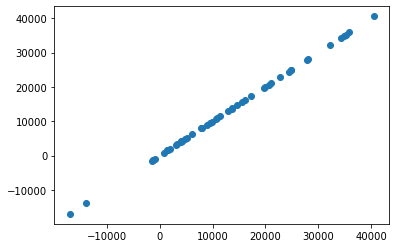

In [8]:
#data1=cases in last 7days,std=13082.564441,mean=13082.564441
#data2=deaths in last 24 hours, std=25.245642,mean =8.380000
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot
# seed random number generator
seed(1)
# prepare data
data1 = 13082.564441 * randn(50) + 13082.564441
data2 = data1 + (25.245642 * randn(50) + 8.380000)
# summarize
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))
# plot
pyplot.scatter(data1, data2)

pyplot.show()

A scatter plot of the two variables shows that there is a relationship between the two variables, there is an increasing trend

In [9]:
#covariance of the variables
np. cov(data1, data2)

array([[1.64185690e+08, 1.64179925e+08],
       [1.64179925e+08, 1.64174557e+08]])

In [10]:
#The covariance between the two variables is positive, <b>16115.10062214</b>. suggesting the variables change in the same direction as we expect.

# <b>calculate the Pearson's correlation between two variables</b>

In [11]:
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
# seed random number generator
seed(1)
# prepare data
data1 = 130.211952 * randn(50) + 4279.780000
data2 = data1 + (25.245642 * randn(50) + 8.380000)
# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.988


The two variables are positively correlated and that the correlation is <b>0.988</b>.
This suggests a high level of correlation between cases reported in the last 7days and deaths reported in the last 24 hours, given that the value is above <b>0.5</b> and close to <b>1.0</b>.

<b>Testing Hypothesis</b>

In [12]:
import scipy.stats

In [13]:
r,p =scipy.stats.pearsonr(data1, data2)
r

0.9879056221276716

In [14]:
p

1.6129895892928053e-40

Since the <b>p-value, <b>0.1687<b> is <b>0.5</b> then I reject <b>Ho<b> and accept the <b>H1</b> that Deaths reported in the last 24 hours are arising from cases reported in the last 7days

Decision tree classifier

In [15]:
%%capture
! pip install seaborn

In [16]:
#Importing libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
%matplotlib inline

In [17]:
Data['Transmission Classification'].value_counts().to_frame()

,Transmission Classification
Community transmission,48
No cases,1
Pending,1


In [18]:
#Printing what will help in this analysis
Data[['Cases - newly reported in last 24 hours','Cases - newly reported in last 7 days',
        'Deaths - newly reported in last 24 hours','Transmission Classification']].head()

,Cases - newly reported in last 24 hours,Cases - newly reported in last 7 days,Deaths - newly reported in last 24 hours,Transmission Classification
18,22910,139690,460,Community transmission
70,116,549,3,Community transmission
82,566,2988,11,Community transmission
84,1453,12624,54,Community transmission
85,146,638,0,Community transmission


<b>One hot encoding</b>

In [19]:
#Use 'one hot encoding technique' to convert categorical varables to binary variables and append them to the New_df Data Frame
new_df = Data[['Cases - newly reported in last 24 hours','Cases - newly reported in last 7 days',
        'Deaths - newly reported in last 24 hours','Transmission Classification']]
new_df= pd.concat([new_df,pd.get_dummies(Data['Transmission Classification'])], axis=1)
new_df.drop(['No cases'], axis = 1,inplace=True)
new_df.drop(['Pending'], axis = 1,inplace=True)
new_df.drop(['Transmission Classification'], axis = 1,inplace=True)
new_df.head()

,Cases - newly reported in last 24 hours,Cases - newly reported in last 7 days,Deaths - newly reported in last 24 hours,Community transmission
18,22910,139690,460,1
70,116,549,3,1
82,566,2988,11,1
84,1453,12624,54,1
85,146,638,0,1


Pre-processing
Using New_df as the WHO COVID-19 global table data July 1st 2021 at 7.47.07 PM.csv data read by pandas, declare the following variables:

X as the Feature Matrix (data of New_df)

y as the response vector (target)

In [20]:
from sklearn import preprocessing

In [21]:
#Assign X to New_df as new data set
X = new_df
#Print first five columns
X[0:5]

,Cases - newly reported in last 24 hours,Cases - newly reported in last 7 days,Deaths - newly reported in last 24 hours,Community transmission
18,22910,139690,460,1
70,116,549,3,1
82,566,2988,11,1
84,1453,12624,54,1
85,146,638,0,1


# Checking the data labels y

In [22]:
y = Data['Transmission Classification'].values
y[0:5]

array(['Community transmission', 'Community transmission',
       'Community transmission', 'Community transmission',
       'Community transmission'], dtype=object)

In [23]:
#Lets assign intergies to our labels for easy analysie. We call in the replace function to do so
y_collection = Data['Transmission Classification'].replace(to_replace=['Community transmission'], value=[2]).values
y_collection[0:5]

array([2, 2, 2, 2, 2], dtype=object)

Normalizing the Data

In [24]:
#Data Standardization give data zero mean and unit variance
from sklearn.preprocessing import StandardScaler
X_initial = X
scaler = preprocessing.StandardScaler().fit(X_initial)
X= scaler.transform(X)
X[0:5]

array([[ 6.922234  ,  6.92672601,  6.82381595,  0.20412415],
       [-0.18676642, -0.19084299, -0.18117953,  0.20412415],
       [-0.04642027, -0.06607925, -0.05855379,  0.20412415],
       [ 0.23021759,  0.42683725,  0.60055957,  0.20412415],
       [-0.17741001, -0.18629031, -0.22716419,  0.20412415]])

In [25]:
#Import libraries
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [26]:
!pip install six

In [27]:
!pip install pydotplus

In [28]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from six import StringIO
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

#Build an empty DecisionTree object with depth 4
CovidTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
CovidTree # it shows the default parameters

In [29]:
#Build an empty DecisionTree object with depth 4
CovidTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
CovidTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [30]:
#Train the decision tree using the global X data set.
CovidTree.fit(X_initial, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [31]:
%conda install graphviz

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


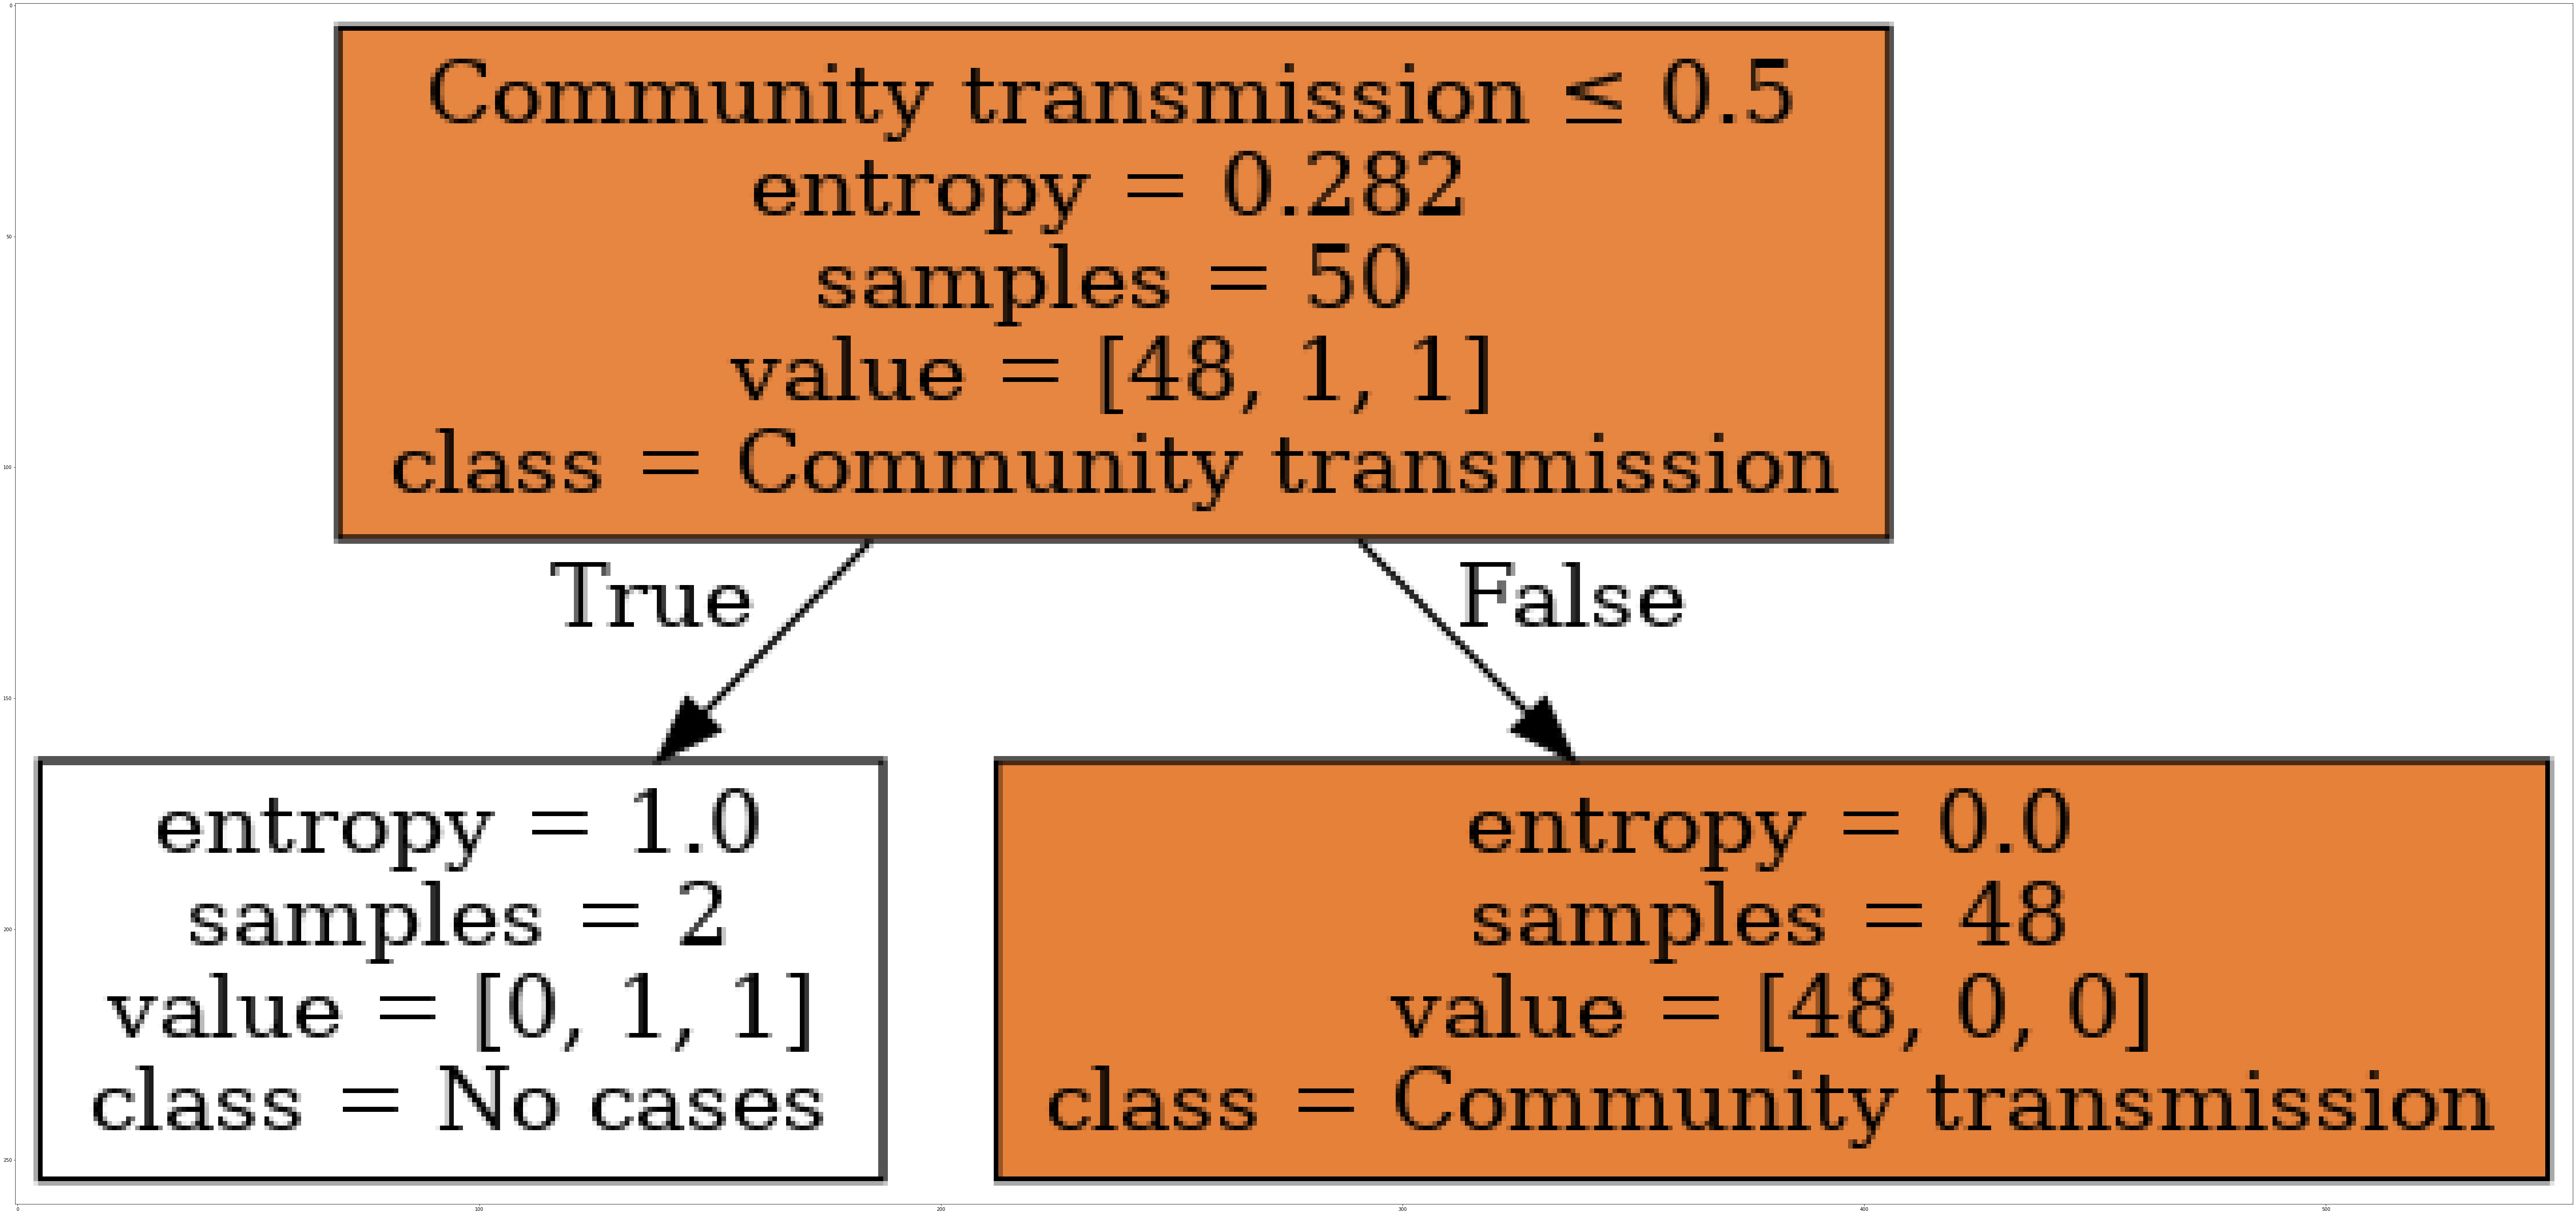

In [32]:
from six import StringIO
from sklearn.externals.six import StringIO
dot_data = StringIO()
filename = "TCtree.png"
new_dfNames = new_df.columns
targetNames = Data['Transmission Classification'].tolist()
out=tree.export_graphviz(CovidTree,feature_names=new_dfNames, out_file=dot_data, class_names= np.unique(y), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

# Evaluating the Accuracy of Decison Tree Algorithm

In [33]:
from sklearn.datasets import load_iris
from sklearn import tree
clf = tree.DecisionTreeClassifier()
iris = load_iris()
clf = clf.fit(iris.data, iris.target)
tree.export_graphviz(clf, out_file='tree.dot')

In [34]:
yhat_tree=CovidTree.predict(X_initial)
tree_jacc_test=metrics.jaccard_score(y, yhat_tree, average='micro')
tree_f1_test=metrics.f1_score(y, yhat_tree, average ='macro')
tree_cnf_matrix = confusion_matrix(y, yhat_tree)
print("Accuracy is ", tree_jacc_test, " F1 is" , tree_f1_test)
print(classification_report(y, yhat_tree))
tree_cnf_matrix

Accuracy is  0.9607843137254902  F1 is 0.5555555555555555
                        precision    recall  f1-score   support

Community transmission       1.00      1.00      1.00        48
              No cases       0.50      1.00      0.67         1
               Pending       0.00      0.00      0.00         1

              accuracy                           0.98        50
             macro avg       0.50      0.67      0.56        50
          weighted avg       0.97      0.98      0.97        50



/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[48,  0,  0],
       [ 0,  1,  0],
       [ 0,  1,  0]])

# REMARKS
The Accuracy is 0.96 and F1 is 0.5.

This indicates that <b>Community Transmission mode</b> is the most significant and dangerous mode of transmission of Covid-19 at the moment in Africa. 
This reqiuires interventions from African governments, Health authorities and every body so as to curb the spread of the disease.

# End
<b><br>Analysed by<br/>
<b><br>Mbusa Elijah<b><br/>
 <b><br>M21/PGDIS/405U<b><br/>